# Trabajo Práctico N°1: "Limpieza y análisis de datos" 

# Digital House - Trabajo Práctico Nº1
## Desafío 1. Análisis exploratorio de un dataset de precios de propiedades
Grupo Nª2
Alumnos:
* Alberto Paparelli
* André Song
* Marianela Riz
* Gloria Caravajal
* Franco Emanuel Rodriguez

Objetivos:
* Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar estrategias para lidiar con los datos perdidos en ciertas variables.
* Realizar un análisis descriptivo de las principales variables.
* Crear nuevas columnas a partir de las características dadas que puedan tener valor
predictivo.

# Importación de librerias:

In [8]:
#importamos las librerias que vamos a utilizar
import numpy as np
import pandas as pd
import re

#librerias graficas
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

# Importación y preparación de datos

In [3]:
# carga, lectura y tamaño del data properati

filename = "../dataset/properati.csv"
data = pd.read_csv(filename)
display(data.sample(n=6)) 
print(f"(Cantidad de Filas, Cantidad de columnas) -> {data.shape}")

Unnamed: 0 operation property_type         place_name  \
45379       45379      sell     apartment      Puerto Madero   
60811       60811      sell     apartment              Tigre   
74564       74564      sell     apartment       Barrio Norte   
14361       14361      sell     apartment            Caseros   
96874       96874      sell     apartment  Palermo Hollywood   
10798       10798      sell         house            Rosario   

                                 place_with_parent_names country_name  \
45379          |Argentina|Capital Federal|Puerto Madero|    Argentina   
60811         |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|    Argentina   
74564           |Argentina|Capital Federal|Barrio Norte|    Argentina   
14361  |Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...    Argentina   
96874  |Argentina|Capital Federal|Palermo|Palermo Hol...    Argentina   
10798                       |Argentina|Santa Fe|Rosario|    Argentina   

                     state_name  geonames_id                  lat-lon  \
45379           Capital Federal    3429760.0  -34.6030584,-58.3637895   
60811  Bs.As. G.B.A. Zona Norte    3427753.0  -34.4307912,-58.5708061   
74564           Capital Federal    3436109.0                      NaN   
14361  Bs.As. G.B.A. Zona Oeste    3862356.0  -34.6026533,-58.5602401   
96874           Capital Federal          NaN                      NaN   
10798                  Santa Fe    3838574.0  -32.9677374,-60.6494652   

             lat  ...  surface_covered_in_m2  price_usd_per_m2  price_per_m2  \
45379 -34.603058  ...                  239.0       4100.294985   5815.899582   
60811 -34.430791  ...                   57.0       1357.142857   1666.666667   
74564        NaN  ...                   69.0       2195.121951   2608.695652   
14361 -34.602653  ...                   41.0       1822.222222   2000.000000   
96874        NaN  ...                   38.0       3023.255814   3421.052632   
10798 -32.967737  ...                   20.0               NaN  17500.000000   

       floor  rooms  expenses  \
45379    NaN    5.0       NaN   
60811    NaN    NaN       NaN   
74564    NaN    NaN    3400.0   
14361    2.0    2.0       NaN   
96874    NaN    NaN       NaN   
10798    NaN   11.0       NaN   

                                           properati_url  \
45379  http://www.properati.com.ar/193xe_venta_depart...   
60811  http://www.properati.com.ar/1a49e_venta_depart...   
74564  http://www.properati.com.ar/1ap5e_venta_depart...   
14361  http://www.properati.com.ar/16s0q_venta_depart...   
96874  http://www.properati.com.ar/1bjad_venta_depart...   
10798  http://www.properati.com.ar/1692t_venta_casa_r...   

                                             description  \
45379  Gran Living de 70 mts todo vista al dique/yach...   
60811  CANEDO PROPIEDADES VENDE Imperdibles departame...   
74564  VENTA DEPARTAMENTO 3 AMBIENTES CON DEPENDENCIA...   
14361  VENTA DE DEPARTAMENTO EN EDIFICIO PISO 2° DPTO...   
96874  Departamento 43m² con Solarium, Palermo, Paler...   
10798  Corredor Responsable: Joaquín Suárez - CI MAT ...   

                                                   title  \
45379  Espectacular Residencia en duplex con las mejo...   
60811             DEPARTAMENTOS AL COSTO EN TIGRE CENTRO   
74564  VENTA DEPARTAMENTO 3 AMBIENTES CON DEPENDENCIA...   
14361                              DEPARTAMENTO EN VENTA   
96874                   Departamento - Palermo Hollywood   
10798                        Venta Oportunidad Dos casas   

                                         image_thumbnail  
45379  https://thumbs4.properati.com/6/MEbMOQsFQ0GYtw...  
60811  https://thumbs4.properati.com/4/b7p58tD1zYshA9...  
74564  https://thumbs4.properati.com/5/dtk7gWk28K1uAP...  
14361  https://thumbs4.properati.com/4/xx5BWihEMCZfIj...  
96874                                                NaN  
10798  https://thumbs4.properati.com/6/rNGxq1HuvUhYHv...  

[6 rows x 26 columns]

(Cantidad de Filas, Cantidad de columnas) -> (121220, 26)


Nuestro data contiene 121220 filas (la primer fila es destinada al titulo de cada columna) y 26 columnas.
Observamos que 13 columnas tienen como tipo de dato el valor "float", 1 columna es de tipo "int" y 12 de tipo "object". 
A su vez, podemos ver el espacio que ocupa la información en el mismo. 

En las siguientes lineas de codigo tenemos un detalle de la informacion que contiene el data, una breve descripcion del tipo de datos que presenta, cantidad y porcentajes de valores nulos y no nulos y una breve informacion estadistica de los datos de cada columna de properati.csv

In [4]:
#Información del dataframe
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

Realizamos un breve análisis estadísto para conocer un poco más nuestra información y observamos:
- Cantidad total de datos de cada columna
- Media
- Desvio estandar
- Valor máximo y mínimo
- Cuartiles. 

In [5]:
#Variables estadísticas/ medidas de disperción de los datos
data.describe()

Unnamed: 0   geonames_id           lat           lon         price  \
count  121220.000000  1.025030e+05  69670.000000  69670.000000  1.008100e+05   
mean    60609.500000  3.574442e+06    -34.626210    -59.266290  4.685259e+05   
std     34993.344153  3.541306e+05      1.980936      2.299922  2.260101e+06   
min         0.000000  3.427208e+06    -54.823985    -75.678931  0.000000e+00   
25%     30304.750000  3.430234e+06    -34.669065    -58.727040  1.100000e+05   
50%     60609.500000  3.433910e+06    -34.597985    -58.480128  1.850000e+05   
75%     90914.250000  3.836668e+06    -34.441299    -58.395908  4.200000e+05   
max    121219.000000  6.948895e+06      4.545843    -53.733330  6.500000e+08   

       price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
count                1.008100e+05     1.008100e+05         81892.000000   
mean                 4.229397e+06     2.397006e+05           233.795328   
std                  6.904714e+06     3.913239e+05          1782.222147   
min                  0.000000e+00     0.000000e+00             0.000000   
25%                  1.583309e+06     8.973388e+04            50.000000   
50%                  2.558452e+06     1.450000e+05            84.000000   
75%                  4.675792e+06     2.650000e+05           200.000000   
max                  8.212711e+08     4.654544e+07        200000.000000   

       surface_covered_in_m2  price_usd_per_m2  price_per_m2        floor  \
count          101313.000000      68617.000000  8.765800e+04  7899.000000   
mean              133.050181       2160.086916  6.912216e+03    17.452336   
std               724.351479       2759.288621  2.837864e+04   120.243621   
min                 0.000000          0.600000  1.510204e+00     1.000000   
25%                45.000000       1218.181818  1.550000e+03     1.000000   
50%                75.000000       1800.000000  2.213115e+03     3.000000   
75%               150.000000       2486.411765  3.355549e+03     6.000000   
max            187000.000000     206333.333333  4.000000e+06  3150.000000   

              rooms      expenses  
count  47390.000000  1.426200e+04  
mean       3.080840  5.009234e+03  
std        1.860773  1.204403e+05  
min        1.000000  1.000000e+00  
25%        2.000000  1.000000e+03  
50%        3.000000  2.000000e+03  
75%        4.000000  4.000000e+03  
max       32.000000  1.000150e+07

Ahora veremos la cantidad y porcentaje de valores nulos. 

Notamos que las columnas floor, expenses y rooms son las que más tienen valores nulos (93.48%, 88.23% y 60.90%)

Mientras que geonames_id, lat-lon, price, currency, price_aprox_local_currency, price_aprox_usd, surface_total_in_m2, surface_covered_in_m2, price_usd_per_m2 y price_per_m2 poseen entre un 16 y 43% de valores nulos.

Siendo el resto de las columnas, columnas que presentan la mayor parte completa de la información.


In [6]:
#Cantidad de valores nulos por columnas
data.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

In [7]:
#Sus respectivos porcentajes
data.isnull().mean()*100   

Unnamed: 0                     0.000000
operation                      0.000000
property_type                  0.000000
place_name                     0.018974
place_with_parent_names        0.000000
country_name                   0.000000
state_name                     0.000000
geonames_id                   15.440521
lat-lon                       42.525986
lat                           42.525986
lon                           42.525986
price                         16.837156
currency                      16.837981
price_aprox_local_currency    16.837156
price_aprox_usd               16.837156
surface_total_in_m2           32.443491
surface_covered_in_m2         16.422208
price_usd_per_m2              43.394654
price_per_m2                  27.686850
floor                         93.483749
rooms                         60.905791
expenses                      88.234615
properati_url                  0.000000
description                    0.001650
title                          0.000000


# Análisis de columnas 

1) Columna operation

In [9]:
#Vemos que no tiene NaNs y solo tiene la opción `sell`. Por este motivo la vamos a eliminar.
# Borrado de columna operation. Utilizamos inplace=True para que no imprima el resultado.
data.drop(['operation'], axis=1, inplace=True)

2. Columna property_type

In [10]:
print(f'Cantidad de registros con NaN: {data.property_type.isnull().sum()}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['property_type']).size().reset_index(name='count'))

Cantidad de registros con NaN: 0
Contamos cantidad de registros unicos:
  property_type  count
0            PH   5751
1     apartment  71065
2         house  40268
3         store   4136


Vemos que no tiene NaNs y tiene 4 categorias `PH`, `apartment`, `house` y `store`.

Todas las categorias tienen una cantidad razonable de datos, por lo que decidimos dejarla sin modificar.

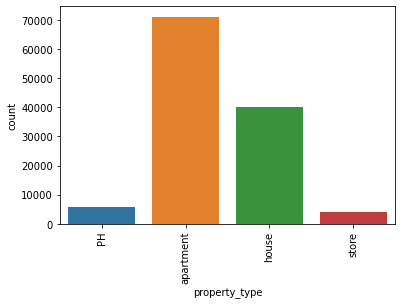

In [20]:
data.groupby('property_type').size().plot(kind='bar')
ax = sns.countplot(data=data, x= "property_type")



3. Columna place_name

Hay 23 registros Nulos. Al ser pocos los imprimimos para ver si se pueden completar de alguna forma y efectivamente vemos que tenemos todas las geo-localizaciones de los datos faltantes por lo que utilizamos un endpoint de openstreetmap para obtener la ciudad.

In [21]:
# creamos una mascara donde colocamos los valores nulos encontrados
mask = data.place_name.isnull()
data[mask]

Unnamed: 0 property_type place_name  \
6489         6489         house        NaN   
10201       10201         house        NaN   
11451       11451         house        NaN   
14839       14839         house        NaN   
18622       18622         house        NaN   
21922       21922         house        NaN   
23664       23664         house        NaN   
24722       24722         house        NaN   
38856       38856         house        NaN   
45970       45970     apartment        NaN   
46642       46642         house        NaN   
53130       53130         house        NaN   
55306       55306         house        NaN   
57703       57703         house        NaN   
57759       57759         house        NaN   
57764       57764         house        NaN   
57793       57793         house        NaN   
58004       58004         house        NaN   
58037       58037         house        NaN   
59069       59069         house        NaN   
62411       62411         house        NaN   
62413       62413         house        NaN   
63849       63849         house        NaN   

                           place_with_parent_names country_name  \
6489   |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   
10201  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   
11451  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   
14839  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   
18622  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   
21922  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   
23664  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   
24722  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   
38856  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   
45970  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   
46642  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   
53130  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   
55306  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   
57703  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   
57759  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   
57764  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   
57793  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   
58004  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   
58037  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   
59069  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   
62411  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   
62413  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   
63849  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||    Argentina   

                     state_name  geonames_id                        lat-lon  \
6489   Bs.As. G.B.A. Zona Norte          NaN    -34.4008968545,-58.63809847   
10201  Bs.As. G.B.A. Zona Norte          NaN          -34.400704,-58.638067   
11451  Bs.As. G.B.A. Zona Norte          NaN  -34.4026880384,-58.6262613379   
14839  Bs.As. G.B.A. Zona Norte          NaN  -34.4007994779,-58.6381735719   
18622  Bs.As. G.B.A. Zona Norte          NaN  -34.4032781195,-58.6263503945   
21922  Bs.As. G.B.A. Zona Norte          NaN          -34.399704,-58.638405   
23664  Bs.As. G.B.A. Zona Norte          NaN  -34.4005161998,-58.6417999185   
24722  Bs.As. G.B.A. Zona Norte          NaN        -34.4007292,-58.6377783   
38856  Bs.As. G.B.A. Zona Norte          NaN         -34.425087,-58.5796585   
45970  Bs.As. G.B.A. Zona Norte          NaN           -34.396074,-58.63738   
46642  Bs.As. G.B.A. Zona Norte          NaN          -34.400749,-58.638754   
53130  Bs.As. G.B.A. Zona Norte          NaN          -34.400978,-58.637809   
55306  Bs.As. G.B.A. Zona Norte          NaN        -34.3996311,-58.6433121   
57703  Bs.As. G.B.A. Zona Norte          NaN      -34.39033749,-58.63368988   
57759  Bs.As. G.B.A. Zona Norte          NaN      -34.39596815,-58.63077164   
57764  Bs.As. G.B.A. Zona Nor

In [23]:
# elegimos al azar cualquier lat y long y buscamos en una url con el objetivo de encontrar la ciudad correspondiente y asi poder completar la columna place_name. 

import requests

lat_lon = "-34.4007292,-58.6377783"
url = f"https://nominatim.openstreetmap.org/search.php?q={lat_lon}&polygon_geojson=1&format=json"
response = requests.get(url=url)
location = response.json()
print(f"La respuesta que obtenemos es:\n{location}\n")
display_name = location[0]["display_name"]
print(f"Seleccionamos el atributo que nos interesa, que tiene todo el string del nombre:\n{display_name}")


La respuesta que obtenemos es:
[{'place_id': 23273444, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'node', 'osm_id': 2578819267, 'boundingbox': ['-34.4006682', '-34.4005682', '-58.6379417', '-58.6378417'], 'lat': '-34.4006182', 'lon': '-58.6378917', 'display_name': 'Nani Helados, Avenida Agustín M. García, Barrio El Lucero, Rincón de Milberg, Partido de Tigre, Buenos Aires, 1624, Argentina', 'class': 'amenity', 'type': 'ice_cream', 'importance': 0.001, 'geojson': {'type': 'Point', 'coordinates': [-58.6378917, -34.4006182]}}]

Seleccionamos el atributo que nos interesa, que tiene todo el string del nombre:
Nani Helados, Avenida Agustín M. García, Barrio El Lucero, Rincón de Milberg, Partido de Tigre, Buenos Aires, 1624, Argentina


Probamos regex y python. Consideramos que es más rápida la ejecución con python puro (sin regex), por lo que lo vamos a utilizar ese código para armar la función.

In [32]:
# Usando Regex
import re
patron = "\, Partido de Tigre"
regex = re.compile(patron, flags = re.IGNORECASE)
r = regex.split(display_name)


patron = "\, "
regex = re.compile(patron, flags = re.IGNORECASE)
regex_name = regex.split(r[0])[-1]
print(f"La ciudad es: {regex_name}")

La ciudad es: Rincón de Milberg


In [25]:
# Usando python
city_list = [x.strip() for x in display_name.split(',')]

import numpy as np
new_name = np.nan
for index, name in enumerate(city_list):
    if name.strip() == "Partido de Tigre":
        new_name = city_list[index-1]
        break
print(f"La ciudad es: {new_name}")

La ciudad es: Rincón de Milberg


In [33]:
def get_city(display_name):
    """ Función para obtener la ciudad en base al string completo de la ubicación.
    Convertimos el string en una lista, separandolo en base a las comas, y si matchea con el Partido de Tigre
    retornamos la posición anterior de la lista.
    """
    city_list = [x.strip() for x in display_name.split(',')]
    new_name = np.nan

    for index, name in enumerate(city_list):
        if name.strip() == "Partido de Tigre":
            new_name = city_list[index-1]
            break

    return new_name

In [34]:
def get_location_from_geo(lat_lon):
    """Funcion que llama al endpoint de openstreetmap para obtener información en base a la latitud y longitud."""
    url = f"https://nominatim.openstreetmap.org/search.php?q={lat_lon}&polygon_geojson=1&format=json"
    response = requests.get(url=url)
    location = response.json()
    return get_city(location[0]["display_name"])

In [35]:
def complete_city_parent_names(place, city):
    """Función para completar place_with_parent_names con la ciudad."""
    return place[:-1] + city  + place[-1]

Teniendo las funciones para obtener la ciudad, buscamos las mismas para cada registro del dataset en donde el campo no este.

In [36]:
mask = data.place_name.isnull()
locations = data[mask]["lat-lon"].apply(get_location_from_geo)
print(locations)

6489     Rincón de Milberg
10201    Rincón de Milberg
11451    Rincón de Milberg
14839    Rincón de Milberg
18622    Rincón de Milberg
21922    Rincón de Milberg
23664    Rincón de Milberg
24722    Rincón de Milberg
38856                Tigre
45970    Rincón de Milberg
46642    Rincón de Milberg
53130    Rincón de Milberg
55306    Rincón de Milberg
57703    Rincón de Milberg
57759    Rincón de Milberg
57764    Rincón de Milberg
57793    Rincón de Milberg
58004    Rincón de Milberg
58037    Rincón de Milberg
59069    Rincón de Milberg
62411    Rincón de Milberg
62413    Rincón de Milberg
63849    Rincón de Milberg
Name: lat-lon, dtype: object


In [38]:
#guardamos la información encontrada
data.loc[mask, "place_name"] = locations

In [39]:
#revisamos que no hayan quedado NaNs
print(f'Cantidad de registros con NaN: {data.place_name.isnull().sum()}')

Cantidad de registros con NaN: 0


In [40]:
#actualizamos información
places = data[mask].apply(lambda x: complete_city_parent_names(x['place_with_parent_names'], x['place_name']), axis=1)
places

6489     |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc...
10201    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc...
11451    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc...
14839    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc...
18622    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc...
21922    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc...
23664    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc...
24722    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc...
38856     |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|
45970    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc...
46642    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc...
53130    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc...
55306    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc...
57703    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc...
57759    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc...
57764    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc...
57793    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc.

In [41]:
data.loc[mask, "place_with_parent_names"] = places

In [42]:
print(data[mask][["place_name", "place_with_parent_names" ]])

              place_name                            place_with_parent_names
6489   Rincón de Milberg  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc...
10201  Rincón de Milberg  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc...
11451  Rincón de Milberg  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc...
14839  Rincón de Milberg  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc...
18622  Rincón de Milberg  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc...
21922  Rincón de Milberg  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc...
23664  Rincón de Milberg  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc...
24722  Rincón de Milberg  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc...
38856              Tigre   |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|
45970  Rincón de Milberg  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc...
46642  Rincón de Milberg  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc...
53130  Rincón de Milberg  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc...
55306  Rincó

In [43]:
new_mask = data.place_name.isnull()
print(data[new_mask])

Empty DataFrame
Columns: [Unnamed: 0, property_type, place_name, place_with_parent_names, country_name, state_name, geonames_id, lat-lon, lat, lon, price, currency, price_aprox_local_currency, price_aprox_usd, surface_total_in_m2, surface_covered_in_m2, price_usd_per_m2, price_per_m2, floor, rooms, expenses, properati_url, description, title, image_thumbnail]
Index: []

[0 rows x 25 columns]


Ahora que no tenemos valores nulos agrupamos por `place_name` y ordenados de forma descendiente.

In [45]:
#Revisamos los datos que tenemos, agrupados por `place_name` y ordenados de forma descendiente.
print("Contamos cantidad de registros unicos:")
print(data.groupby(['place_name']).size().reset_index(name='count').sort_values(['count'], ascending=False))

Contamos cantidad de registros unicos:
         place_name  count
315         Córdoba   9254
798         Rosario   8504
612   Mar del Plata   6534
925           Tigre   3325
668        Nordelta   3315
...             ...    ...
393          Franck      1
820     San Antonio      1
397          Gaiman      1
399        Garuhapé      1
1059        Álvarez      1

[1060 rows x 2 columns]


In [46]:
# Revisamos los datos que tenemos, agrupados por `place_name` y ordenados de forma descendiente. Filtrando aquellos que tienen más de 10 registros
print("Contamos cantidad de registros unicos:")
data_agrupada = data.groupby(['place_name']).size().reset_index(name='count').query('count > 10')
print(data_agrupada)

Contamos cantidad de registros unicos:
               place_name  count
3                  Abasto    139
4     Abril Club de Campo     19
5         Acacias Blancas     34
6                Acassuso    242
9                 Adrogué    734
...                   ...    ...
1049      Virrey del Pino     16
1050             Virreyes     41
1053                Wilde    139
1055          Yerba Buena    191
1057               Zárate     15

[467 rows x 2 columns]


Agrupando Propiedades por ciudades y filtrando las ciudades que tienen mas de 10 propiedades, vemos que se reduce a la mitad de ciudades.

Lo que hacemos es crear una nueva columna place_name_gt_10, donde ccopiamos las ciudades que tienen más de 10 propiedades, y las que tienen menos las agrupamos en una categoria llamada `ciudad chica`

In [48]:
import numpy as np

# Filtro de ciudades con mas de 10 propiedades
list_city_gt_10 = data.groupby(['place_name']).size().reset_index(name='count').query('count > 10').place_name.tolist()
# Se crea la mascara
mask_city_gt_10 = data['place_name'].isin(list_city_gt_10)
print(f"Registros de ciudades con más de 10 propiedades: {mask_city_gt_10.value_counts().loc[True]}")
print(f"Registros de ciudades con 10 o menos propiedades: {mask_city_gt_10.value_counts().loc[False]}")

# se crea la columna nueva ciudad_chica
data['ciudad_chica'] = np.where(data['place_name'].isin(list_city_gt_10), data['place_name'], "Ciudad Chica")


Registros de ciudades con más de 10 propiedades: 119364
Registros de ciudades con 10 o menos propiedades: 1856


In [49]:
# Chequeo
# 3     Abasto                  139
# 4     Abril Club de Campo     19
# 399   Garuhapé                1
# 1059  Álvarez                 1
display(data[data.place_name.eq("Abasto")][['place_name', 'ciudad_chica']].sample(1))
display(data[data.place_name.eq("Abril Club de Campo")][['place_name', 'ciudad_chica']].sample(1))
display(data[data.place_name.eq("Garuhapé")][['place_name', 'ciudad_chica']].sample(1))
display(data[data.place_name.eq("Álvarez")][['place_name', 'ciudad_chica']].sample(1))


place_name ciudad_chica
72711     Abasto       Abasto

place_name         ciudad_chica
72466  Abril Club de Campo  Abril Club de Campo

place_name  ciudad_chica
94884   Garuhapé  Ciudad Chica

place_name  ciudad_chica
14018    Álvarez  Ciudad Chica

4. Columna place_with_par

In [55]:
#vemos y comparamos los nulos de las siguientes columnas
data[['place_name', 'place_with_parent_names', 'country_name', 'state_name']].isnull().sum()

place_name                 0
place_with_parent_names    0
country_name               0
state_name                 0
dtype: int64

Ninguna presenta nulos. Decidimos no eliminarlas ya que las mismas serviran al momento de evaluar los precios de propiedades. 

5. Columna country_name

La misma no contiene valores nulos y su único valor es "Argentina", por lo tando decidimos eliminarla ya que no es un campo relevante o al menos no nos brindará más información siendo la idea del presente trabajo "limpiar los datos".

In [56]:
data.drop(['country_name'], axis=1, inplace=True)

11. Columna price

In [67]:
#comparamos si los valores de las 3 columnas son nulos en la misma fila. 
#se puede ver en id 5 y 20 que la respuesta a lo anterior es si, los NaNs se presentan en las mismas ubicaciones. 
data[['price', 'price_aprox_local_currency', 'price_aprox_usd']].head(25)

price  price_aprox_local_currency  price_aprox_usd
0    62000.0                  1093959.00         62000.00
1   150000.0                  2646675.00        150000.00
2    72000.0                  1270404.00         72000.00
3    95000.0                  1676227.50         95000.00
4    64000.0                  1129248.00         64000.00
5        NaN                         NaN              NaN
6   130000.0                  2293785.00        130000.00
7   138000.0                  2434941.00        138000.00
8   195000.0                  3440677.50        195000.00
9   460000.0                   455201.45         25798.49
10   70000.0                  1235115.00         70000.00
11  150000.0                  2646675.00        150000.00
12  115000.0                  2029117.50        115000.00
13  111700.0                  1970890.65        111700.00
14  147900.0                  2609621.55        147900.00
15  250000.0                  4411125.00        250000.00
16  239000.0                  4217035.50        239000.00
17  315000.0                  5558017.50        315000.00
18  570000.0                 10057365.00        570000.00
19  350000.0                  6175575.00        350000.00
20       NaN                         NaN              NaN
21  270500.0                  4772837.25        270500.00
22  290000.0                  5116905.00        290000.00
23   82000.0                  1446849.00         82000.00
24  355000.0                  6263797.50        355000.00

12. Columna currency

In [119]:
#decidimos utilizar la moneda USD ya que la mayor parte de los datos manejan ese tipo de moneda.
print(f'Cantidad de registros con NaN: {data.currency.isnull().sum()}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['currency']).size().reset_index(name='count'))

Cantidad de registros con NaN: 20411
Contamos cantidad de registros unicos:
  currency  count
0      ARS  13219
1      PEN      2
2      USD  87587
3      UYU      1


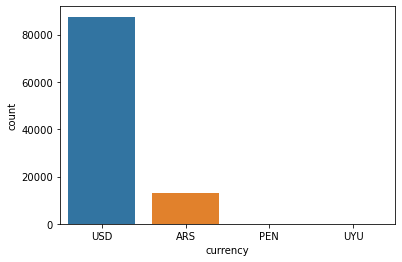

In [118]:
ax = sns.countplot(data=data, x= "currency")

13. Columna price_aprox_local_currency

In [134]:
#recordamos la cantidad de nulos, porcentaje y cantidad de registros únicos
print(f'Cantidad de registros con NaN: {data.price_aprox_local_currency.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.price_aprox_local_currency.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['price_aprox_local_currency']).size().reset_index(name='count'))

Cantidad de registros con NaN: 20410
Porcentaje de registros con NaN: 16.837155584886982
Contamos cantidad de registros unicos:
       price_aprox_local_currency  count
0                    0.000000e+00      1
1                    8.234017e+04      1
2                    8.738350e+04      1
3                    8.822250e+04      2
4                    8.906114e+04      5
...                           ...    ...
10359                2.823120e+08      1
10360                3.440678e+08      1
10361                4.054773e+08      1
10362                4.411125e+08      1
10363                8.212711e+08      1

[10364 rows x 2 columns]


Esta columna tiene 20.410 datos nulos o su equivalente 16,83%. Consideramos que esta variable es relevante para la proyección, observamos un valor máximo de 821.271.104 alejado significativamente de la media que es de 4.229.397.
Esta columna podriamos completarla multiplicando el precio en dolares que se logra rellenar por la tasa de cambio empleada, que en este caso es de 17.6445 pesos argentinos por dolar. (valor calculado al dividir price_aprox_local_currency entre price_aprox_usd)

<AxesSubplot:xlabel='property_type'>

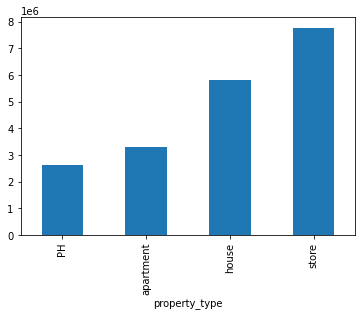

In [135]:
#graficamos el dato por tipo de propiedad con el fin de observar los rangos de precios. 
#Sin embargo vemos que hay unos valores muy altos lo que eleva la dimensión del eje y a numeros exponenciales.
data.groupby('property_type')['price_aprox_local_currency'].mean().plot.bar()

In [136]:
# Al visualizar esta grafica podemos observar como en esta columna existen valores extremos con 
# un apartamento ubicado en la latitud -34.62 y lon -58.37 con un precio de 821.27 millones 
# (corresponde a un apartamento ubicado en San Telmo con una superficie total de 200.000 m2 
# Tambien encontramos una casa con valor de 0 en lat -4.54 y lon de -75.67

import plotly.express as px
fig = px.scatter_3d(data, x='lat', y='lon', z='price_aprox_local_currency',
                    color='property_type')
fig.show()

In [137]:
data.price_aprox_local_currency.describe()

count    1.008100e+05
mean     4.229397e+06
std      6.904714e+06
min      0.000000e+00
25%      1.583309e+06
50%      2.558452e+06
75%      4.675792e+06
max      8.212711e+08
Name: price_aprox_local_currency, dtype: float64

Detalle de valores extremos

En el catplot elaborado para esta variable comparada por tipo de propiedad podemos observar como en apartamentos se evidencian valores muy por encima de los valores medios, en el caso de las casas se observan algunas propiedades alejadas de la media.

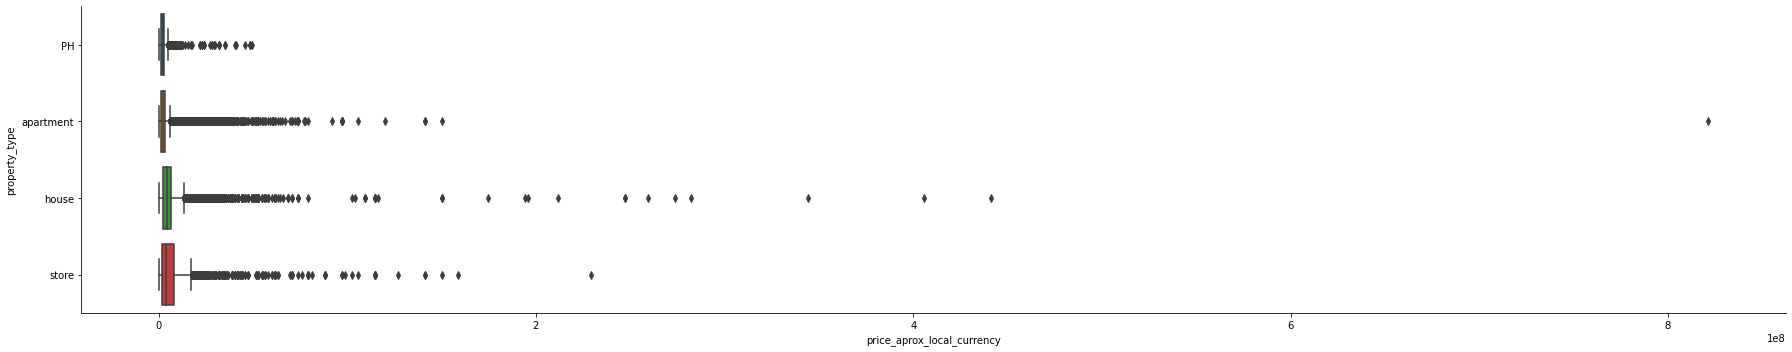

In [138]:
sns.catplot(data=data, x= 'price_aprox_local_currency', y="property_type", kind="box", height=5, aspect=5,)

Para rellenar los valores Nan de esta columna utilizamos regex extrayendo datos de las columnas title y description.

In [139]:
# Buscamos precio aproximado en moneda local en columnas mencionadas anteriormente.
data[['description', 'title']] = data[['description', 'title']].apply(lambda x: x.astype(str))

#Valor minimo en moneda local $82.340 pesos argentinos

patron = r'[$]([0-9]*\.?\,?[0-9]*\.?\,?[0-9]*)'

regex = re.compile(patron, flags = re.IGNORECASE)

precio_aprox_local_currency_titulo=data['title'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['price_aprox_local_currency'].fillna(precio_aprox_local_currency_titulo, inplace=True)

precio_aprox_local_currency_descripcion=data['description'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['price_aprox_local_currency'].fillna(precio_aprox_local_currency_descripcion, inplace=True)

In [141]:
#Al aplicar regex a la columna, se logro reducir los NaN pasando del 16.83% al 13.62%.
print (f'Nuevo % de valores nulos luego de aplicar regex: {data.price_aprox_local_currency.isna().sum()/data.price_aprox_local_currency.shape[0]*100}')
print (f'Entradas: {data.price_aprox_local_currency.shape[0]}')

Nuevo % de valores nulos luego de aplicar regex: 13.620689655172413
Entradas: 121220


Aplicando regex logramos rellenar algunos datos pero no podemos tomar el mismo ya que nos está trayendo valores errados como propiedades con precios de 1 y tambien porque existen para valorar otros campos. Por esta razón no vamos a emplearlo.

Finalmente, hemos decidido eliminar esta columna, teniendo en cuenta que el calculo por metro cuadrado esta hecho en dolares y al observar el numero de NaNs en esta variable que corresponde al mismo numero en price_aprox_usd no nos es de utilidad mantenerla para calcular el segundo valor.

14. Columna price_aprox_usd

In [144]:
print(f'Cantidad de registros con NaN: {data.price_aprox_usd.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.price_aprox_usd.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['price_aprox_usd']).size().reset_index(name='count'))

Cantidad de registros con NaN: 20410
Porcentaje de registros con NaN: 16.837155584886982
Contamos cantidad de registros unicos:
       price_aprox_usd  count
0                 0.00      1
1              4666.62      1
2              4952.45      1
3              5000.00      2
4              5047.53      5
...                ...    ...
10359      16000000.00      1
10360      19500000.00      1
10361      22980378.29      1
10362      25000000.00      1
10363      46545445.00      1

[10364 rows x 2 columns]


<AxesSubplot:xlabel='property_type'>

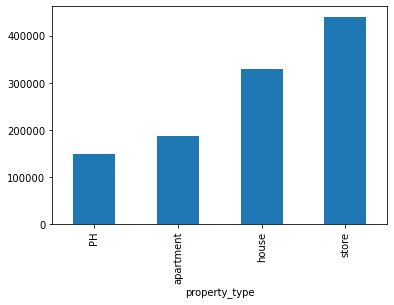

In [143]:
#graficamos el dato por tipo de propiedad con el fin de observar los rangos de precios. En esta grafica podemos observar la variación en la media de los precios que existe de acuerdo al tipo de vivienda.
data.groupby('property_type')['price_aprox_usd'].mean().plot.bar()

In [ ]:
# Al visualizar esta grafica podemos observar como en esta columna existen valores extremos 
# un apartamento ubicado en la latitul -34.62 y lon -58.37 con un precio de 46 millones de dolares (corresponde a un apartamento ubicado en San Telmo con una superficie total de 200.000 m2 
import plotly.express as px
fig = px.scatter_3d(data, x='lat', y='lon', z='price_aprox_usd',
                    color='property_type')
fig.show()

In [145]:
data.price_aprox_usd.describe()

count    1.008100e+05
mean     2.397006e+05
std      3.913239e+05
min      0.000000e+00
25%      8.973388e+04
50%      1.450000e+05
75%      2.650000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64

La columna en cuestión tiene 20.410 datos nulos o su equivalente 16,83%. Consideramos que esta variable es relevante para la proyección, teniendo en cuenta que el valor por metro cuadrado cubierto y total estan calculados en esta moneda, observamos un valor máximo de 46,545,445 alejado significativamente de la media que es de 239,700. 

Esta columna podriamos completarla realizando diferentes operaciones:
- Extrayendo este dato de las columnas description y title
- Diviendo el precio total en usd por el precio del metro cuadrado

Detalle de valores extremos en la columna price_aprox_usd:

En el catplot elaborado para esta variable comparada por tipo de propiedad podemos observar como en apartamentos se evidencian valores muy por encima de los valores medios, en el caso de las casas se observan algunas propiedades alejadas de la media.

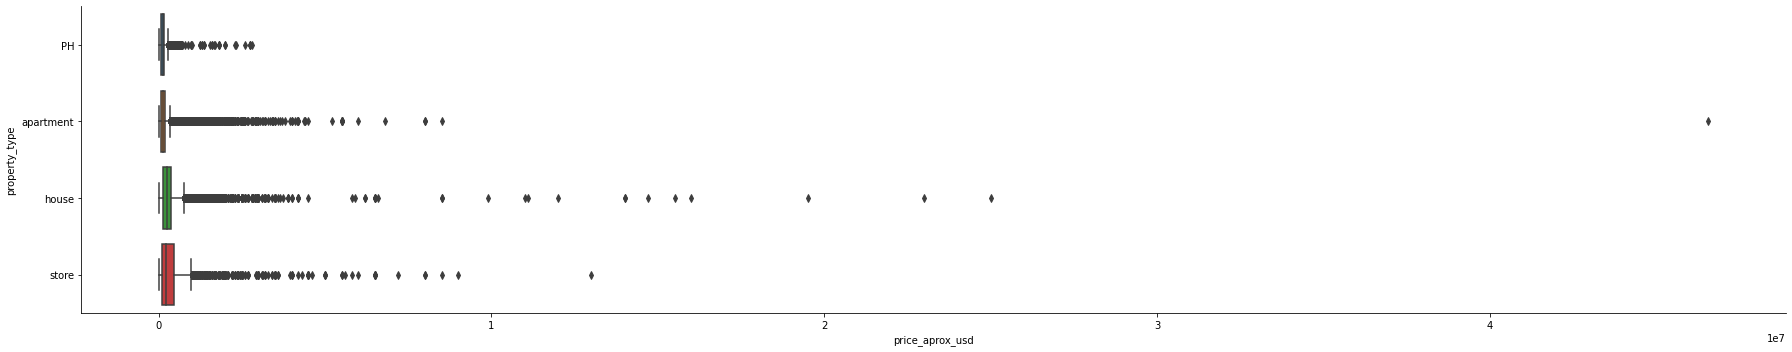

In [147]:
sns.catplot(data=data, x= 'price_aprox_usd', y="property_type", kind="box", height=5, aspect=5,)

Para rellenar los valores Nan de esta columna utilizamos regex extrayendo datos de las columnas title y description. 
Para ello tomamos diferentes expresiones de la moneda UD, USD, usd, us, U$S

In [148]:
data[['description', 'title']] = data[['description', 'title']].apply(lambda x: x.astype(str))

patron = r'U\$D\s?([0-9]*\.?\,?[0-9]*\.?\,?[0-9]*)|USD\s?([0-9]*\.?\,?[0-9]*\.?\,?[0-9]*)|usd\s?([0-9]*\.?\,?[0-9]*\.?\,?[0-9]*)|us\$d\s?([0-9]*\.?\,?[0-9]*\.?\,?[0-9]*)|U\$S\s?([0-9]*\.?\,?[0-9]*\.?\,?[0-9]*)'

regex = re.compile(patron, flags = re.IGNORECASE)

precio_aprox_usd_titulo=data['title'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['price_aprox_usd'].fillna(precio_aprox_usd_titulo, inplace=True)

precio_aprox_usd_descripcion=data['description'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['price_aprox_usd'].fillna(precio_aprox_usd_descripcion, inplace=True)

In [151]:
#Al aplicar regex a la columna, se lograron reducir los nan pasando del 16.83% al 14.02%.
print (f'Nuevo % de valores nulos luego de aplicar regex: {data.price_aprox_usd.isna().sum()/data.price_aprox_usd.shape[0]*100}')
print (f'Entradas: {data.price_aprox_usd.shape[0]}')

Nuevo % de valores nulos luego de aplicar regex: 14.02986305890117
Entradas: 121220


Aunque aplicando regex logramos rellenar algunos datos, no podemos tomar el dato porque nos está trayendo valores errados como propiedades con precios de USD 1 y tambien porque existen USD para valorar otros campos. Por esta razón no vamos a emplearlo.

Esta columna se mantiene y se calculara el valor tomando la superficie total y el price_usd_per_m2

15. Columna surface_total_in_m2

In [187]:
# Columna surface_total_in_m2
print(f'Cantidad de registros con NaN: {data.surface_total_in_m2.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.surface_total_in_m2.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['surface_total_in_m2']).size().reset_index(name='count'))

Cantidad de registros con NaN: 39328
Porcentaje de registros con NaN: 32.44349117307375
Contamos cantidad de registros unicos:
      surface_total_in_m2  count
0                     0.0    383
1                    10.0     21
2                    11.0      8
3                    12.0     12
4                    13.0      6
...                   ...    ...
1682             100350.0      1
1683             107000.0      4
1684             110000.0      3
1685             154438.0      1
1686             200000.0      2

[1687 rows x 2 columns]


<AxesSubplot:xlabel='state_name'>

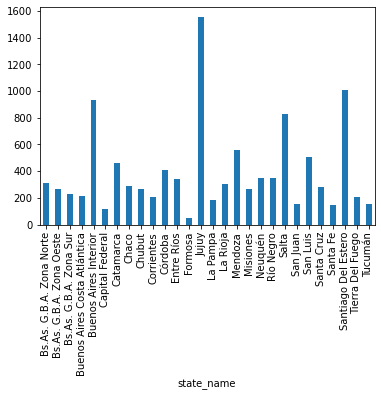

In [188]:
#graficamos el dato por estado con el fin de observar los rangos de areas de superficie total.
#En esta grafica podemos observar la variación en la media de las areas que existen de acuerdo al Estado, se observa como en Juluy el valor medio se eleva, deberia revisarse si corresponde al valor extremo de alguna o algunas propiedades.
data.groupby('state_name')['surface_total_in_m2'].mean().plot.bar()

In [ ]:
# Al visualizar esta grafica podemos observar como en esta columna existen valores extremos  de 200.000 m2 de superficie total
# dos apartamentos ubicados en Santa Fe y Santelmo con un area de 200.000 m2 con lat lon de -31.6400864,-60.7046147 y -34.6213421,-58.3741846

import plotly.express as px
fig = px.scatter_3d(data, x='lat', y='lon', z='surface_total_in_m2',
                    color='property_type')
fig.show()

Esta columna tiene 39.328 datos nulos o su equivalente 32,44%. El precio aprox en USD se calcula sobre esta superficie, por esta razón se considera un dato relevante. 
Tiene un valor minimo de cero y un máximo de 200.000, datos que se alejan de la media de 233m2.

Podemos completar algunos datos extrayendo de las columnas title y description. Si se completan las columnas precio aprox en usd y precio en USD por metro cuadrado puede realizarse un calculo de este valor.

In [190]:
data.surface_total_in_m2.describe()

count     81892.000000
mean        233.795328
std        1782.222147
min           0.000000
25%          50.000000
50%          84.000000
75%         200.000000
max      200000.000000
Name: surface_total_in_m2, dtype: float64

Detalle de valores extremos en la columna surface_total_in_m2

En el catplot elaborado para esta variable comparada por tipo de propiedad podemos observar como en apartamentos se evidencian areas muy por encima de los valores medios, en el caso de las casas se observan algunas propiedades alejadas de la media.

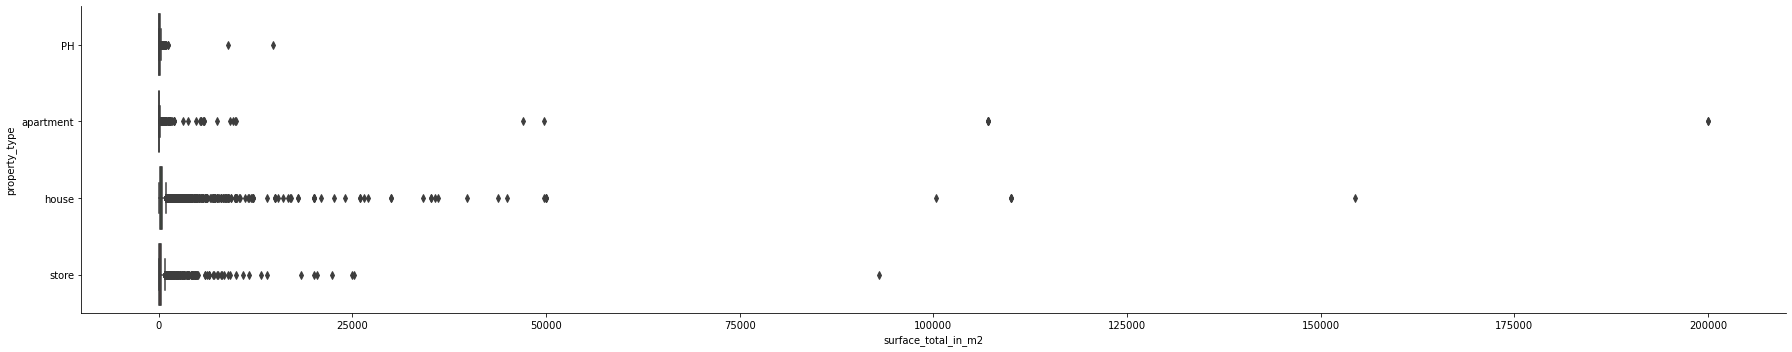

In [191]:
sns.catplot(data=data, x= 'surface_total_in_m2', y="property_type", kind="box", height=5, aspect=5,)

Utilizamos regex para rellenar la columna surface_total_in_m2

Extraemos los datos de las columnas title y description. Para ello utilizamos expresiones de números que vengan acompañados del texto m2, M2, metros2, Metros2, mts2 y Mts2. No se consideran los datos separados del número 2 porque se podría incurrir en el error de que haya un dato con el valor M y luego figure el número 2 correspondiente a otras variables.

In [192]:
# Buscamos superficie total en metros cuadrado en los titulos y en la descripción con Mts2

#el area más pequeña es de 0 m2 hay 383 registos en ceros, trae a la base m2, debemos eliminarlos y transformar . a , ???

data[['description', 'title']] = data[['description', 'title']].apply(lambda x: x.astype(str))

patron = r'([0-9]*\.?\,?[0-9]*)\s?[m|M|mts|Mts|metros|Metros|METROS]\.?\S*2'
    
regex = re.compile(patron, flags = re.IGNORECASE)

superficie_total_titulo=data['title'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['surface_total_in_m2'].fillna(superficie_total_titulo, inplace=True)

superficie_total_descripcion=data['description'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['surface_total_in_m2'].fillna(superficie_total_descripcion, inplace=True)

In [195]:
#luego de aplicar regex se logro recucir el porcentaje de nans al pasar del 32.44% al 23.52%.
print (f'El nuevo % de valores nulos que quedan luego de aplicar regex: {data.surface_total_in_m2.isna().sum()/data.surface_total_in_m2.shape[0]*100}')
print (f'Entradas: {data.surface_total_in_m2.shape[0]}')

El nuevo % de valores nulos que quedan luego de aplicar regex: 23.52829566078205
Entradas: 121220


In [196]:
#transformamos los datos de la columna ya que al extraer datos de regex se convirtieron en tipo object
data['surface_total_in_m2'] = pd.to_numeric(data['surface_total_in_m2'],errors = 'coerce')

In [197]:
#luego de transformar los datos a datos numericos con pandas el porcentaje de nans se redujo de 32.44% al 25.67%. 
#estos valores se mantendran y seran empleados para el calculo del price_aprox_usd, junto con el valor de price_usd_per m2

print (f'El nuevo % de valores nulos que quedan luego de aplicar regex: {data.surface_total_in_m2.isna().sum()/data.surface_total_in_m2.shape[0]*100}')
print (f'Entradas: {data.surface_total_in_m2.shape[0]}')

El nuevo % de valores nulos que quedan luego de aplicar regex: 25.6723312984656
Entradas: 121220


16. Columna surface_covered_in_m2

In [198]:
# Columna surface_covered_in_m2
print(f'Cantidad de registros con NaN: {data.surface_covered_in_m2.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.surface_covered_in_m2.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['surface_covered_in_m2']).size().reset_index(name='count'))

Cantidad de registros con NaN: 19907
Porcentaje de registros con NaN: 16.422207556508827
Contamos cantidad de registros unicos:
     surface_covered_in_m2  count
0                      0.0      2
1                      1.0    367
2                      2.0     12
3                      3.0      7
4                      4.0     10
..                     ...    ...
990                30000.0      1
991                35000.0      1
992                38240.0      1
993                49000.0      1
994               187000.0      1

[995 rows x 2 columns]


<AxesSubplot:xlabel='state_name'>

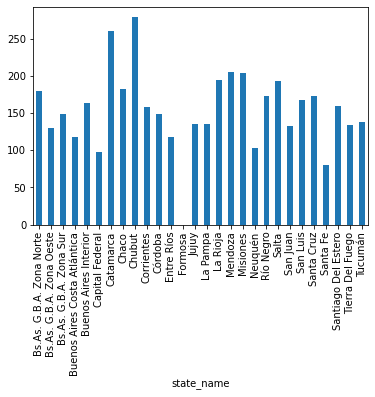

In [199]:
#graficamos el dato por Estado con el fin de observar los rangos de areas de superficie cubierta. Se observa como en los etados de Catamarca y de Chubut las areas exceden el promedio de los demás estados.
data.groupby('state_name')['surface_covered_in_m2'].mean().plot.bar()

In [ ]:
# Al visualizar esta grafica podemos observar como en esta columna existen valores extremos con 
# un apartamento ubicado en la latitul -34.59457 y lon -58.40917 con un area cubierta de 187.000m2 que resulta ser un error de digitación,
# ya que al revisar en la descripción se aclara que es un apartamento de 187m2 
# Tambien encontramos una casa con valor de 0 en lat -4.54 y lon de -75.67
import plotly.express as px
fig = px.scatter_3d(data, x='lat', y='lon', z='surface_covered_in_m2',
                    color='property_type')
fig.show()

In [202]:
#corregimos el valor de este dato para lo cual primero lo localizamos
data[data.surface_covered_in_m2==187000]

Unnamed: 0 property_type    place_name  \
76012     76012.0     apartment  Barrio Norte   

                        place_with_parent_names       state_name  geonames_id  \
76012  |Argentina|Capital Federal|Barrio Norte|  Capital Federal    3436109.0   

                            lat-lon        lat        lon     price  ...  \
76012  -34.5945726028,-58.409166395 -34.594573 -58.409166  600000.0  ...   

      price_usd_per_m2 price_per_m2 floor  rooms  expenses  \
76012              NaN     3.208556   NaN    NaN   11000.0   

                                           properati_url  \
76012  http://www.properati.com.ar/1ar12_venta_depart...   

                                             description  \
76012  Barrio Norte EXCELENTE Semipiso al Frente Balc...   

                                title  \
76012  Excelente PISO en Barrio Norte   

                                         image_thumbnail  ciudad_chica  
76012  https://thumbs4.properati.com/0/Z9TPL-aDoGIWcI...  Barrio Norte  

[1 rows x 25 columns]

In [201]:
#Ahora lo corregimos con at
data.at['76012','surface_covered_in_m2']=187

 Esta columna tiene 19.907 datos nulos o su equivalente 16,42%. Esta variable se emplea para calcular el precio por m2, tomando como base el precio aprox en USD asi que es una columna relevante. Tiene un valor máximo de 187.000 metros cuadrados valor que se aleja de la media de 133 metros cuadrados.

Podriamos completarla extrayendo datos de las columnas title y description, tambien calculando el valor tomando el precio en USD y el valor del metro cuadrado.

Detalle de valores extremos en la columna surface_covered_in_m2

En el catplot elaborado para esta variable comparada por tipo de propiedad podemos observar especialmente el area de un apartamento cuya area sobrepasa los 180.000 metros cuadrados.

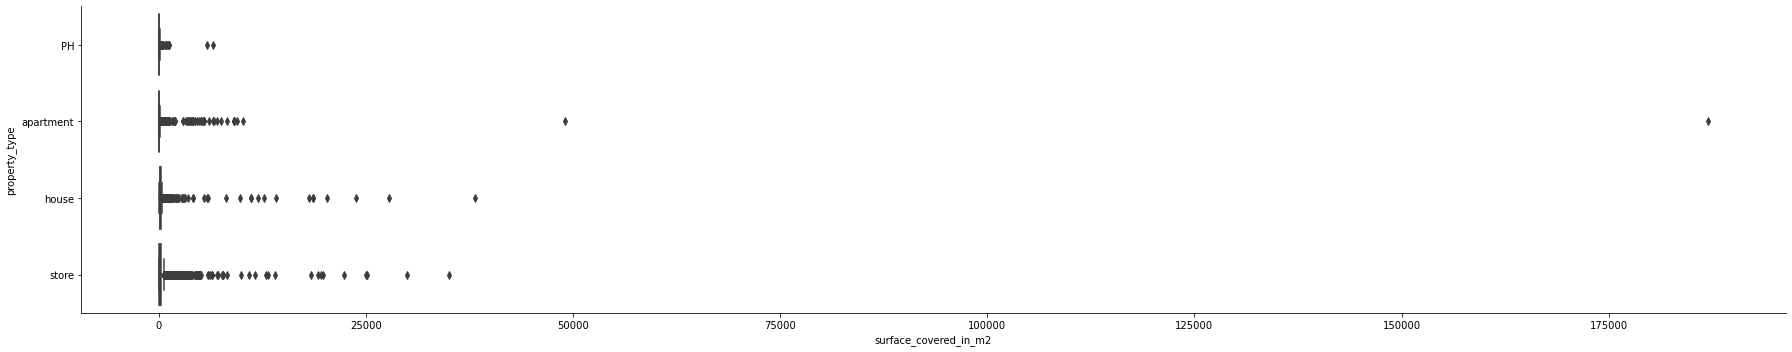

In [203]:
sns.catplot(data=data, x= 'surface_covered_in_m2', y="property_type", kind="box", height=5, aspect=5,)

Para rellenar utilizamos Regex 

Continuamos la extraccion de datos de las columnas title y description, para ello tomamos las diferentes denominaciónes de metros cuadrados: (m,M,mts, Mts, metros, Metros, METROS). Tambien empleamos las terminaciones despues del número 2 (c,cub,cubiertos)

In [204]:
# Buscamos superficies cubiertas en metros cuadrado en los titulos y en la descripción

#el area más pequeña es de 1 m2, 161 aptos, 146 casas, deberiamos sacar el dato para aquellas que sean null o tengan menos de 10 m2 trae a la base m2, debemos eliminarlos y transformar . a , ???

data[['description', 'title']] = data[['description', 'title']].apply(lambda x: x.astype(str))

patron = r'([0-9]*\.?\,?[0-9]*)\s?[m|M|mts|Mts|metros|Metros|METROS]\.?\S*2\S*[c|cub|cubiertos]'

regex = re.compile(patron, flags = re.IGNORECASE)

superficie_cubierta_titulo=data['title'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['surface_covered_in_m2'].fillna(superficie_cubierta_titulo, inplace=True)

superficie_cubierta_descripcion=data['description'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['surface_covered_in_m2'].fillna(superficie_cubierta_descripcion, inplace=True)

In [205]:
#luego de aplicar el regex se logro recucir el porcentaje de nans al pasar del 16.42% al 15.80%.
print (f'El nuevo % de valores nulos que quedan luego de aplicar regex: {data.surface_covered_in_m2.isna().sum()/data.surface_covered_in_m2.shape[0]*100}')
print (f'Entradas: {data.surface_covered_in_m2.shape[0]}')

El nuevo % de valores nulos que quedan luego de aplicar regex: 15.808317040776762
Entradas: 121221


In [207]:
#transformamos los datos de la columna ya que al extraer datos de regex se convirtieron en tipo object
data['surface_covered_in_m2'] = pd.to_numeric(data['surface_covered_in_m2'],errors = 'coerce')

Estos valores se mantendran y se emplearan para el calculo del price_aprox_usd, junto con el valor de price_per m2

17. Columna price_usd_per_m2

In [249]:
#columna price_usd_per_m2
print(f'Cantidad de registros con NaN: {data.price_usd_per_m2.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.price_usd_per_m2.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['price_usd_per_m2']).size().reset_index(name='count'))

Cantidad de registros con NaN: 52604
Porcentaje de registros con NaN: 43.395121307364235
Contamos cantidad de registros unicos:
       price_usd_per_m2  count
0              0.600000      1
1              1.000000      1
2              1.184571      1
3              1.236986      1
4              1.573442      1
...                 ...    ...
25561      78533.333333      1
25562      80000.000000      1
25563     104486.114286      1
25564     173826.066667      1
25565     206333.333333      1

[25566 rows x 2 columns]


In [186]:
#vemos que tipo de moneda tienen los valores nulos
data[data.price_usd_per_m2.isnull()]["currency"].value_counts()

USD    27454
ARS     4735
PEN        2
UYU        1
Name: currency, dtype: int64

<AxesSubplot:xlabel='state_name'>

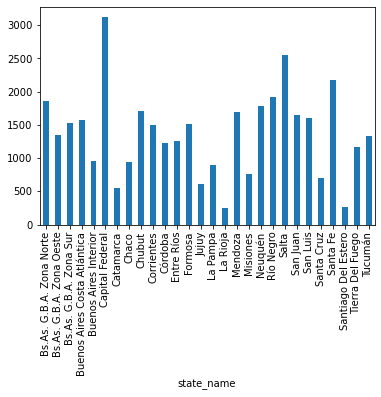

In [153]:
#graficamos el dato por Estado con el fin de observar los rangos de precios en dolares por metro cuadrado
#En esta grafica podemos observar la variación en la media de las areas que existen de acuerdo al Estado.
data.groupby('state_name')['price_usd_per_m2'].mean().plot.bar()

In [250]:
# para graficar vamos a tomar unicamente los datos no nulos de la columna price_usd_per_m2

price_usd_null=data.price_usd_per_m2.isnull()
price_usd_null

0         False
1          True
2         False
3          True
4         False
          ...  
121216    False
121217    False
121218    False
121219    False
76012      True
Name: price_usd_per_m2, Length: 121221, dtype: bool

In [ ]:
# Al visualizar esta grafica podemos observar como en esta columna existen valores extremos con 
# un apartamento ubicado en la latitud -34.6222 y lon -58.41609 con un valor  de u$d206.000,
import plotly.express as px
fig = px.scatter_3d(data[~price_usd_null], x='lat', y='lon', z='price_usd_per_m2',
                    color='property_type')
fig.show()

In [154]:
data.price_usd_per_m2.describe()

count     68617.000000
mean       2160.086916
std        2759.288621
min           0.600000
25%        1218.181818
50%        1800.000000
75%        2486.411765
max      206333.333333
Name: price_usd_per_m2, dtype: float64

Esta columna tiene 52.604 datos nulos o su equivalente 43.39%. Consideramos que esta variable es relevante para la proyección, por esta razón podriamos completarla realizando diferentes operaciones:
- Rellenando el valor de la columna con la mediana de los precios por metro por place name
- Empleamos la mediana para que los datos no se vean afectados por los valores extremos.

Detalle de valores extremos en la columna price_usd_per_m2

En el catplot elaborado para esta variable comparada por tipo de propiedad podemos observar 6 datos que se alejan significativamente de la media principalmente en el tipo de propiedad apartamentos.

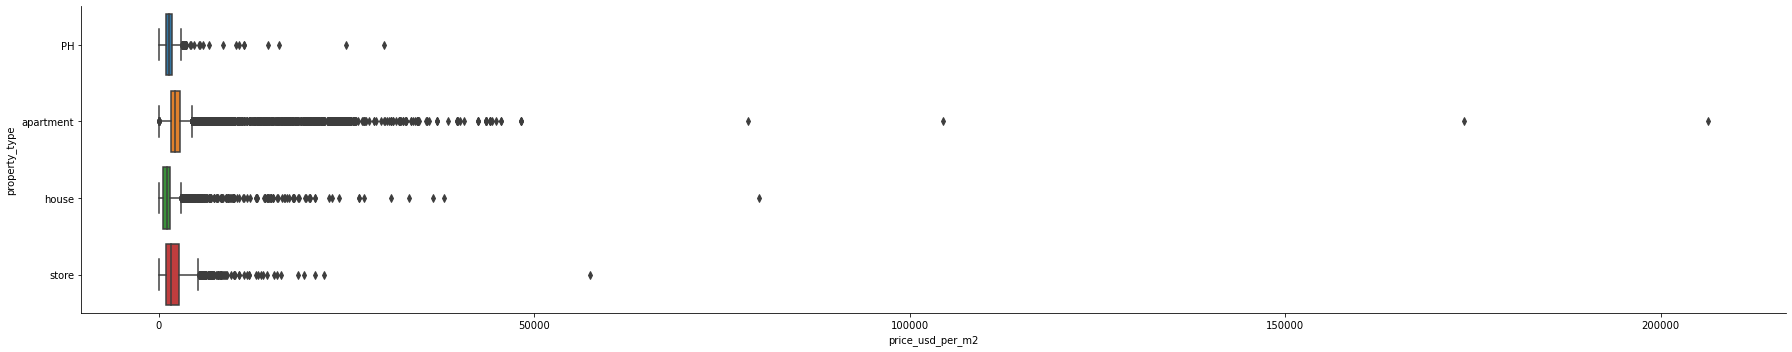

In [155]:
sns.catplot(data=data, x= 'price_usd_per_m2', y="property_type", kind="box", height=5, aspect=5,)

Hemos decidido emplear la mediana teniendo en cuenta que en los datos se encuentran valores extremos significativos que podrian afectar la proyección de los datos.

In [158]:
#extraemos la mediana de el precio por m2 en dolares por place name

mediana_precio_usd_place_name = data.groupby('place_name').price_usd_per_m2.median()

mediana_precio_usd_place_name.head()

place_name
 Country Maschwitz Club    1369.986720
 los alamos                1600.000000
9 de Abril                  137.917638
Abasto                     2133.333333
Abril Club de Campo        1418.181818
Name: price_usd_per_m2, dtype: float64

In [251]:
print(type(mediana_precio_usd_place_name))

<class 'pandas.core.series.Series'>


In [160]:
mediana_precio_usd_place_name.index

Index([' Country Maschwitz Club', ' los alamos', '9 de Abril', 'Abasto',
       'Abril Club de Campo', 'Acacias Blancas', 'Acassuso', 'Achiras',
       'Adolfo Alsina', 'Adrogué',
       ...
       'Virreyes', 'Vistalba', 'Wenceslao Escalante', 'Wilde',
       'William Morris', 'Yerba Buena', 'Zelaya', 'Zárate',
       'coordenadas 34.255511', 'Álvarez'],
      dtype='object', name='place_name', length=1060)

In [171]:
mediana_precio_usd_place_name.values

array([1369.98671979, 1600.        ,  137.91763792, ...,   20.63778814,
       1943.46289753,           nan])

In [252]:
#construimos un dataframe con las columnas place_name y price_usd_per_m2

mediana_precio_usd_place_name_df = pd.DataFrame(mediana_precio_usd_place_name)

mediana_precio_usd_place_name_df.head(5)

price_usd_per_m2
place_name                               
 Country Maschwitz Club       1369.986720
 los alamos                   1600.000000
9 de Abril                     137.917638
Abasto                        2133.333333
Abril Club de Campo           1418.181818

In [253]:
#reseteamos el indice para que place_name se convierta en columna

mediana_precio_usd_place_name_df.reset_index(inplace=True)
mediana_precio_usd_place_name_df.head(5)

place_name  price_usd_per_m2
0   Country Maschwitz Club       1369.986720
1               los alamos       1600.000000
2               9 de Abril        137.917638
3                   Abasto       2133.333333
4      Abril Club de Campo       1418.181818

In [254]:
# creamos una columna con los valores de la mediana del precio por m2 en usd para cada place_name
data = data.merge(mediana_precio_usd_place_name_df, on = "place_name", suffixes = ("", "_median"), how = 'left')
data.head(5)

Unnamed: 0 property_type place_name  \
0         0.0            PH  Mataderos   
1         1.0     apartment   La Plata   
2         2.0     apartment  Mataderos   
3         3.0            PH    Liniers   
4         4.0     apartment     Centro   

                             place_with_parent_names  \
0              |Argentina|Capital Federal|Mataderos|   
1        |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|   
2              |Argentina|Capital Federal|Mataderos|   
3                |Argentina|Capital Federal|Liniers|   
4  |Argentina|Buenos Aires Costa Atlántica|Mar de...   

                     state_name  geonames_id                  lat-lon  \
0               Capital Federal    3430787.0  -34.6618237,-58.5088387   
1        Bs.As. G.B.A. Zona Sur    3432039.0  -34.9038831,-57.9643295   
2               Capital Federal    3430787.0  -34.6522615,-58.5229825   
3               Capital Federal    3431333.0  -34.6477969,-58.5164244   
4  Buenos Aires Costa Atlántica    3435548.0  -38.0026256,-57.5494468   

         lat        lon     price  ... floor rooms expenses  \
0 -34.661824 -58.508839   62000.0  ...     2     2      NaN   
1 -34.903883 -57.964330  150000.0  ...     2     2      NaN   
2 -34.652262 -58.522982   72000.0  ...     2     2      NaN   
3 -34.647797 -58.516424   95000.0  ...     3     3      NaN   
4 -38.002626 -57.549447   64000.0  ...     2     2      NaN   

                                       properati_url  \
0  http://www.properati.com.ar/15bo8_venta_ph_mat...   
1  http://www.properati.com.ar/15bob_venta_depart...   
2  http://www.properati.com.ar/15bod_venta_depart...   
3  http://www.properati.com.ar/15boh_venta_ph_lin...   
4  http://www.properati.com.ar/15bok_venta_depart...   

                                         description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   
1  Venta de departamento en décimo piso al frente...   
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...   
3  PH 3 ambientes con patio. Hay 3 deptos en lote...   
4  DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...   

                                               title  \
0                 2 AMB TIPO CASA SIN EXPENSAS EN PB   
1  VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37   ...   
2           2 AMB 3ER PISO CON ASCENSOR APTO CREDITO   
3                       PH 3 amb. cfte. reciclado      
4  DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...   

                                     image_thumbnail ciudad_chica rooms_title  \
0  https://thumbs4.properati.com/8/BluUYiHJLhgIIK...    Mataderos          []   
1  https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...     La Plata          []   
2  https://thumbs4.properati.com/5/SXKr34F_IwG3W_...    Mataderos          []   
3  https://thumbs4.properati.com/3/DgIfX-85Mog5SP...      Liniers          []   
4  https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...       Centro          []   

   price_usd_per_m2_median  
0              1442.307692  
1              1608.585859  
2              1442.307692  
3              1875.000000  
4              1869.565217  

[5 rows x 27 columns]

In [255]:
#cambiamos los nan de la columna price_usd_per_m2 por la mediana calculada para cada place_name

data.price_usd_per_m2.fillna(data.price_usd_per_m2_median, inplace = True)

data.head(5)

Unnamed: 0 property_type place_name  \
0         0.0            PH  Mataderos   
1         1.0     apartment   La Plata   
2         2.0     apartment  Mataderos   
3         3.0            PH    Liniers   
4         4.0     apartment     Centro   

                             place_with_parent_names  \
0              |Argentina|Capital Federal|Mataderos|   
1        |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|   
2              |Argentina|Capital Federal|Mataderos|   
3                |Argentina|Capital Federal|Liniers|   
4  |Argentina|Buenos Aires Costa Atlántica|Mar de...   

                     state_name  geonames_id                  lat-lon  \
0               Capital Federal    3430787.0  -34.6618237,-58.5088387   
1        Bs.As. G.B.A. Zona Sur    3432039.0  -34.9038831,-57.9643295   
2               Capital Federal    3430787.0  -34.6522615,-58.5229825   
3               Capital Federal    3431333.0  -34.6477969,-58.5164244   
4  Buenos Aires Costa Atlántica    3435548.0  -38.0026256,-57.5494468   

         lat        lon     price  ... floor rooms expenses  \
0 -34.661824 -58.508839   62000.0  ...     2     2      NaN   
1 -34.903883 -57.964330  150000.0  ...     2     2      NaN   
2 -34.652262 -58.522982   72000.0  ...     2     2      NaN   
3 -34.647797 -58.516424   95000.0  ...     3     3      NaN   
4 -38.002626 -57.549447   64000.0  ...     2     2      NaN   

                                       properati_url  \
0  http://www.properati.com.ar/15bo8_venta_ph_mat...   
1  http://www.properati.com.ar/15bob_venta_depart...   
2  http://www.properati.com.ar/15bod_venta_depart...   
3  http://www.properati.com.ar/15boh_venta_ph_lin...   
4  http://www.properati.com.ar/15bok_venta_depart...   

                                         description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   
1  Venta de departamento en décimo piso al frente...   
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...   
3  PH 3 ambientes con patio. Hay 3 deptos en lote...   
4  DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...   

                                               title  \
0                 2 AMB TIPO CASA SIN EXPENSAS EN PB   
1  VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37   ...   
2           2 AMB 3ER PISO CON ASCENSOR APTO CREDITO   
3                       PH 3 amb. cfte. reciclado      
4  DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...   

                                     image_thumbnail ciudad_chica rooms_title  \
0  https://thumbs4.properati.com/8/BluUYiHJLhgIIK...    Mataderos          []   
1  https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...     La Plata          []   
2  https://thumbs4.properati.com/5/SXKr34F_IwG3W_...    Mataderos          []   
3  https://thumbs4.properati.com/3/DgIfX-85Mog5SP...      Liniers          []   
4  https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...       Centro          []   

   price_usd_per_m2_median  
0              1442.307692  
1              1608.585859  
2              1442.307692  
3              1875.000000  
4              1869.565217  

[5 rows x 27 columns]

In [257]:
#luego de reemplazar los valores por la mediana por place name se logro recucir el porcentaje de nans al pasar del 43.39% al 1.26%.
print (f'El nuevo % de valores nulos que quedan luego de remplazar por la mediana por place_name: {data.price_usd_per_m2.isna().sum()/data.price_usd_per_m2.shape[0]*100}')
print (f'Entradas: {data.price_usd_per_m2.shape[0]}')

El nuevo % de valores nulos que quedan luego de remplazar por la mediana por place_name: 1.2638074261060377
Entradas: 121221


18. Columna price_per_m2

In [259]:
# Columna price_per_m2 : revisamos que opciones tiene, o si se repite lo mismo.
print(f'Cantidad de registros con NaN: {data.price_per_m2.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.price_per_m2.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['price_per_m2']).size().reset_index(name='count'))

Cantidad de registros con NaN: 33563
Porcentaje de registros con NaN: 27.687446894514977
Contamos cantidad de registros unicos:
       price_per_m2  count
0      1.510204e+00      1
1      3.208556e+00      1
2      7.462100e+00      1
3      7.987660e+00      1
4      8.291223e+00      1
...             ...    ...
25180  1.825000e+06      1
25181  2.000000e+06      1
25182  2.300000e+06      1
25183  2.600000e+06      1
25184  4.000000e+06      1

[25185 rows x 2 columns]


<AxesSubplot:xlabel='state_name'>

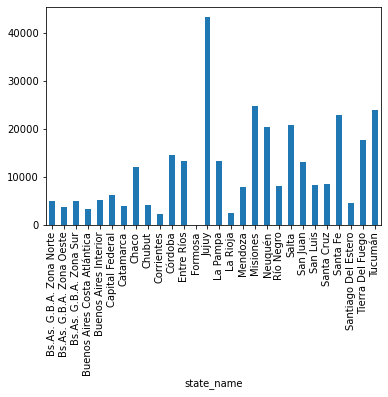

In [260]:
#graficamos el dato por Estado con el fin de observar los rangos de precios por metro cuadrado
#En esta grafica podemos observar la variación en la media de las areas que existen de acuerdo al Estado.
data.groupby('state_name')['price_per_m2'].mean().plot.bar()

In [261]:
price_null=data.price_per_m2.isnull()
price_null

0         False
1          True
2         False
3          True
4         False
          ...  
121216    False
121217    False
121218    False
121219    False
121220     True
Name: price_per_m2, Length: 121221, dtype: bool

In [ ]:
# Al visualizar esta grafica podemos observar como en esta columna existen valores extremos y al revisar los datos vemos que son errores
#en algunos casos los valores de metros cuadrados son los mismos valores_aprox en dolares o pesos.

import plotly.express as px
fig = px.scatter_3d(data[~price_usd_null], x='lat', y='lon', z='price_per_m2',
                    color='property_type')
fig.show()

In [262]:
####### CONTROLAR ###############
#################################

#identificamos los casos para poder corregirlos o eliminarlos de acuerdo con la observación.
# En algunos casos los valores por metro cuadrado son los mismos precios aprox en u$d o en $, lo que evidencia un error en el dato.
#Hay 41 registros que tienen valores suoperiores a u$d400.000 por metro cuadrado cubierto

#####  Qué hacemos con estos registros?????#######

data[data.price_per_m2>=400000]

Unnamed: 0 property_type              place_name  \
349          349.0     apartment                 Córdoba   
7416        7416.0         house              San Isidro   
8170        8170.0         house        Fincas de Iraola   
8396        8396.0         house               Caballito   
10528      10528.0         house                 Córdoba   
17571      17571.0         house                   Tigre   
17572      17572.0         house                   Tigre   
17575      17575.0         house                   Tigre   
17576      17576.0         house                   Tigre   
18451      18451.0         house                   Tigre   
28550      28550.0         store                 Palermo   
33190      33190.0     apartment           Puerto Madero   
38931      38931.0         store              Marcos Paz   
42575      42575.0         house            Monte Castro   
45433      45433.0         house  Villa General Belgrano   
48473      48473.0         house               Versalles   
49274      49274.0     apartment        Villa Carlos Paz   
53324      53324.0     apartment        Villa Carlos Paz   
54148      54148.0     apartment       Rincón de Milberg   
55123      55123.0         house        Villa Santa Rita   
55181      55181.0     apartment                 Córdoba   
58009      58009.0         store              Hurlingham   
58062      58062.0         store                 Quilmes   
63886      63886.0         house                Misiones   
64131      64131.0     apartment                   Nuñez   
64132      64132.0         store                   Nuñez   
64134      64134.0     apartment                   Nuñez   
64135      64135.0     apartment                   Nuñez   
64136      64136.0     apartment                   Nuñez   
64137      64137.0         store                   Nuñez   
65701      65701.0         store               Llavallol   
73058      73058.0         store                   Lanús   
73523      73523.0         house                   Lanús   
75360      75360.0         house                   Lanús   
76249      76249.0     apartment              Colegiales   
76250      76250.0     apartment              Colegiales   
87571      87571.0         store                Martínez   
95567      95567.0         house                   Pilar   
110750    110750.0         house            Villa Devoto   
112999    112999.0     apartment              Colegiales   
116956    116956.0         house                   Pilar   

                                  place_with_parent_names  \
349                           |Argentina|Córdoba|Córdoba|   
7416    |Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...   
8170    |Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|...   
8396                |Argentina|Capital Federal|Caballito|   
10528                         |Argentina|Córdoba|Córdoba|   
17571          |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|   
17572          |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|   
17575          |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|   
17576          |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|   
18451    |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|   
28550                 |Argentina|Capital Federal|Palermo|   
33190           |Argentina|Capital Federal|Puerto Madero|   
38931   |Argentina|Bs.As. G.B.A. Zona Oeste|Marcos Paz...   
42575            |Argentina|Capital Federal|Monte Castro|   
45433          |Argentina|Córdoba|Villa General Belgrano|   
48473               |Argentina|Capital Federal|Versalles|   
49274                |Argentina|Córdoba|Villa Carlos Paz|   
53324                |Argentina|Córdoba|Villa Carlos Paz|   
54148   |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Rinc...   
55123        |Argentina|Capital Federal|Villa Santa Rita|   
55181                         |Argentina|Córdoba|Córdoba|   
58009   |Argentina|Bs.As. G.B.A. Zona Oeste|Hurlingham...   
58062   |Argentina|Bs.As. G.B.A. Zona Sur|Quilmes|Quil...   
63886                  

In [ ]:
data.price_per_m2.describe()

Esta columna tiene 33.562 datos nulos o su equivalente 27.68%. Consideramos que esta variable es relevante para la proyección, y podriamos completarla realizando diferentes operaciones: 

- Los datos tienen un valor máximo de 3,999,999 dolares por metro cuadrado, frente a una media de 6,912 dolares por metro cuadrado.

- Calculando la mediana del valor m2 cubierto de acuerdo con el place name

Detalle de valores extremos en la columna price_per_m2

En el catplot elaborado para esta variable comparada por tipo de propiedad podemos observar 10 datos que se alejan significativamente de la media principalmente en el tipo de propiedad apartamentos.

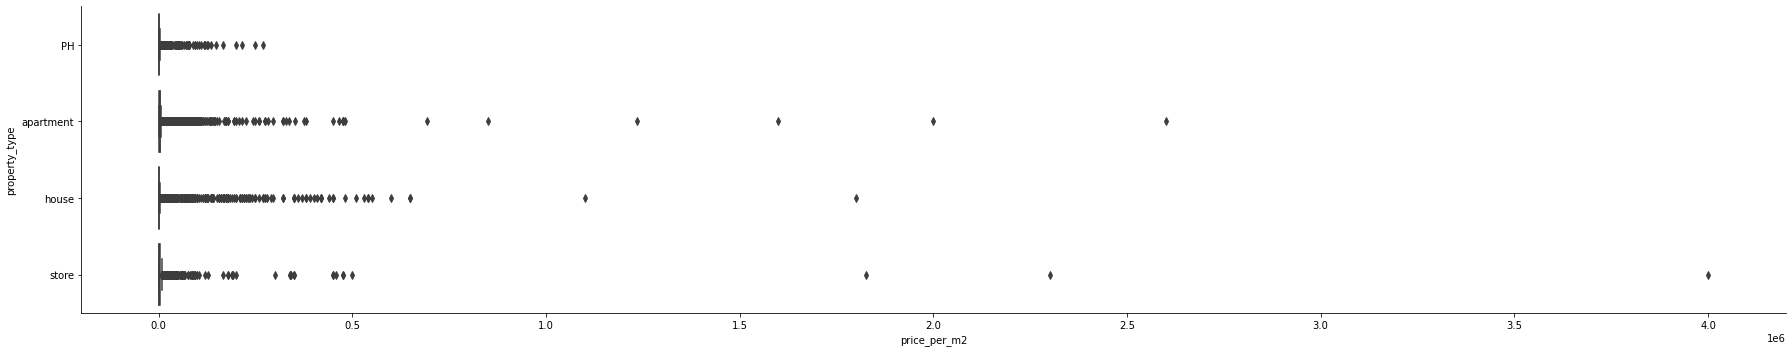

In [258]:
sns.catplot(data=data, x= 'price_per_m2', y="property_type", kind="box", height=5, aspect=5,)

Hemos decidido emplear la mediana teniendo en cuenta que en los datos se encuentran valores extremos significativos que podrian afectar la proyección de los datos.

In [263]:
#vamos a extraer la mediana de el precio por m2 por place name

mediana_precio_place_name = data.groupby('place_name').price_per_m2.median()

mediana_precio_place_name.head()

place_name
 Country Maschwitz Club    1230.769231
 los alamos                1990.243902
9 de Abril                  687.500000
Abasto                     2303.030303
Abril Club de Campo        1808.695652
Name: price_per_m2, dtype: float64

In [264]:
print(type(mediana_precio_place_name))

<class 'pandas.core.series.Series'>


In [265]:
mediana_precio_place_name.index

Index([' Country Maschwitz Club', ' los alamos', '9 de Abril', 'Abasto',
       'Abril Club de Campo', 'Acacias Blancas', 'Acassuso', 'Achiras',
       'Adolfo Alsina', 'Adrogué',
       ...
       'Virreyes', 'Vistalba', 'Wenceslao Escalante', 'Wilde',
       'William Morris', 'Yerba Buena', 'Zelaya', 'Zárate',
       'coordenadas 34.255511', 'Álvarez'],
      dtype='object', name='place_name', length=1060)

In [266]:
mediana_precio_place_name.values

array([1230.76923077, 1990.24390244,  687.5       , ..., 1349.01873327,
       2301.25523013,           nan])

In [267]:
#vamos a construir un dataframe con las columnas place_name y price_per_m2

mediana_precio_place_name_df = pd.DataFrame(mediana_precio_place_name)

mediana_precio_place_name_df.head(5)

price_per_m2
place_name                           
 Country Maschwitz Club   1230.769231
 los alamos               1990.243902
9 de Abril                 687.500000
Abasto                    2303.030303
Abril Club de Campo       1808.695652

In [268]:
#vamos a resetear el indice para que place_name se convierta en columna

mediana_precio_place_name_df.reset_index(inplace=True)
mediana_precio_place_name_df.head(5)

place_name  price_per_m2
0   Country Maschwitz Club   1230.769231
1               los alamos   1990.243902
2               9 de Abril    687.500000
3                   Abasto   2303.030303
4      Abril Club de Campo   1808.695652

In [269]:
#vamos a crear una columna con los valores de la mediana del precio por m2 para cada place_name
data = data.merge(mediana_precio_place_name_df, on = "place_name", suffixes = ("", "_median"), how = 'left')
data.head(5)

Unnamed: 0 property_type place_name  \
0         0.0            PH  Mataderos   
1         1.0     apartment   La Plata   
2         2.0     apartment  Mataderos   
3         3.0            PH    Liniers   
4         4.0     apartment     Centro   

                             place_with_parent_names  \
0              |Argentina|Capital Federal|Mataderos|   
1        |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|   
2              |Argentina|Capital Federal|Mataderos|   
3                |Argentina|Capital Federal|Liniers|   
4  |Argentina|Buenos Aires Costa Atlántica|Mar de...   

                     state_name  geonames_id                  lat-lon  \
0               Capital Federal    3430787.0  -34.6618237,-58.5088387   
1        Bs.As. G.B.A. Zona Sur    3432039.0  -34.9038831,-57.9643295   
2               Capital Federal    3430787.0  -34.6522615,-58.5229825   
3               Capital Federal    3431333.0  -34.6477969,-58.5164244   
4  Buenos Aires Costa Atlántica    3435548.0  -38.0026256,-57.5494468   

         lat        lon     price  ... rooms expenses  \
0 -34.661824 -58.508839   62000.0  ...     2      NaN   
1 -34.903883 -57.964330  150000.0  ...     2      NaN   
2 -34.652262 -58.522982   72000.0  ...     2      NaN   
3 -34.647797 -58.516424   95000.0  ...     3      NaN   
4 -38.002626 -57.549447   64000.0  ...     2      NaN   

                                       properati_url  \
0  http://www.properati.com.ar/15bo8_venta_ph_mat...   
1  http://www.properati.com.ar/15bob_venta_depart...   
2  http://www.properati.com.ar/15bod_venta_depart...   
3  http://www.properati.com.ar/15boh_venta_ph_lin...   
4  http://www.properati.com.ar/15bok_venta_depart...   

                                         description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   
1  Venta de departamento en décimo piso al frente...   
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...   
3  PH 3 ambientes con patio. Hay 3 deptos en lote...   
4  DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...   

                                               title  \
0                 2 AMB TIPO CASA SIN EXPENSAS EN PB   
1  VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37   ...   
2           2 AMB 3ER PISO CON ASCENSOR APTO CREDITO   
3                       PH 3 amb. cfte. reciclado      
4  DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...   

                                     image_thumbnail  ciudad_chica  \
0  https://thumbs4.properati.com/8/BluUYiHJLhgIIK...     Mataderos   
1  https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...      La Plata   
2  https://thumbs4.properati.com/5/SXKr34F_IwG3W_...     Mataderos   
3  https://thumbs4.properati.com/3/DgIfX-85Mog5SP...       Liniers   
4  https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...        Centro   

  rooms_title price_usd_per_m2_median  price_per_m2_median  
0          []             1442.307692          1786.431479  
1          []             1608.585859          1666.666667  
2          []             1442.307692          1786.431479  
3          []             1875.000000          2156.862745  
4          []             1869.565217          1978.472222  

[5 rows x 28 columns]

In [270]:
#vamos a reemplazar los nan de la columna price_per_m2 por la mediana calculada para cada place_name

data.price_per_m2.fillna(data.price_per_m2_median, inplace = True)

data.head(5)

Unnamed: 0 property_type place_name  \
0         0.0            PH  Mataderos   
1         1.0     apartment   La Plata   
2         2.0     apartment  Mataderos   
3         3.0            PH    Liniers   
4         4.0     apartment     Centro   

                             place_with_parent_names  \
0              |Argentina|Capital Federal|Mataderos|   
1        |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|   
2              |Argentina|Capital Federal|Mataderos|   
3                |Argentina|Capital Federal|Liniers|   
4  |Argentina|Buenos Aires Costa Atlántica|Mar de...   

                     state_name  geonames_id                  lat-lon  \
0               Capital Federal    3430787.0  -34.6618237,-58.5088387   
1        Bs.As. G.B.A. Zona Sur    3432039.0  -34.9038831,-57.9643295   
2               Capital Federal    3430787.0  -34.6522615,-58.5229825   
3               Capital Federal    3431333.0  -34.6477969,-58.5164244   
4  Buenos Aires Costa Atlántica    3435548.0  -38.0026256,-57.5494468   

         lat        lon     price  ... rooms expenses  \
0 -34.661824 -58.508839   62000.0  ...     2      NaN   
1 -34.903883 -57.964330  150000.0  ...     2      NaN   
2 -34.652262 -58.522982   72000.0  ...     2      NaN   
3 -34.647797 -58.516424   95000.0  ...     3      NaN   
4 -38.002626 -57.549447   64000.0  ...     2      NaN   

                                       properati_url  \
0  http://www.properati.com.ar/15bo8_venta_ph_mat...   
1  http://www.properati.com.ar/15bob_venta_depart...   
2  http://www.properati.com.ar/15bod_venta_depart...   
3  http://www.properati.com.ar/15boh_venta_ph_lin...   
4  http://www.properati.com.ar/15bok_venta_depart...   

                                         description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   
1  Venta de departamento en décimo piso al frente...   
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...   
3  PH 3 ambientes con patio. Hay 3 deptos en lote...   
4  DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...   

                                               title  \
0                 2 AMB TIPO CASA SIN EXPENSAS EN PB   
1  VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37   ...   
2           2 AMB 3ER PISO CON ASCENSOR APTO CREDITO   
3                       PH 3 amb. cfte. reciclado      
4  DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...   

                                     image_thumbnail  ciudad_chica  \
0  https://thumbs4.properati.com/8/BluUYiHJLhgIIK...     Mataderos   
1  https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...      La Plata   
2  https://thumbs4.properati.com/5/SXKr34F_IwG3W_...     Mataderos   
3  https://thumbs4.properati.com/3/DgIfX-85Mog5SP...       Liniers   
4  https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...        Centro   

  rooms_title price_usd_per_m2_median  price_per_m2_median  
0          []             1442.307692          1786.431479  
1          []             1608.585859          1666.666667  
2          []             1442.307692          1786.431479  
3          []             1875.000000          2156.862745  
4          []             1869.565217          1978.472222  

[5 rows x 28 columns]

In [271]:
#luego de reemplazar los valores por la mediana por place name se logran reducir el porcentaje de nans al pasar del 43.39% al 0.3283%.
print (f'% de valores nulos que quedan luego de remplazar por la mediana por place_name: {data.price_per_m2.isna().sum()/data.price_per_m2.shape[0]*100}')
print (f'entradas: {data.price_per_m2.shape[0]}')

% de valores nulos que quedan luego de remplazar por la mediana por place_name: 0.3291508896973297
entradas: 121221


19. Columna floor

In [208]:
#columna floor
print(f'Cantidad de registros con NaN: {data.floor.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.floor.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['floor']).size().reset_index(name='count'))

Cantidad de registros con NaN: 113322
Porcentaje de registros con NaN: 93.48380231148067
Contamos cantidad de registros unicos:
      floor  count
0       1.0   2080
1       2.0   1542
2       3.0    914
3       4.0    658
4       5.0    484
..      ...    ...
177  1609.0      4
178  2103.0      1
179  2177.0      1
180  2509.0      1
181  3150.0      1

[182 rows x 2 columns]


Esta columna posee una gran cantidad de valores NaNs (93.48%). 
Se podria eliminar pero intentaremos completarla ya que podria influir en el precio de los departamentos.

Tratamos de completar los valores faltantes con varias expresiones regulares diferentes.

In [245]:
data[['description', 'title']] = data[['description', 'title']].apply(lambda x: x.astype(str))

patron = r'([0-9]+)\s?[amb|DOS|dor|DOR]'
#r'([\d]+) ?[am|dor]'

regex = re.compile(patron, flags = re.IGNORECASE)
floor_titulo=data['title'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['floor'].fillna(floor_titulo, inplace=True)
floor_descripcion=data['description'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['floor'].fillna(floor_descripcion, inplace=True)

In [247]:
#Al aplicar regex a la columna, se logro reducir los NaN pasando del 60.90% al 14.30%
print (f'Nuevo % de valores nulos luego de aplicar regex: {data.floor.isna().sum()/data.floor.shape[0]*100}')
print (f'Entradas: {data.floor.shape[0]}')

Nuevo % de valores nulos luego de aplicar regex: 14.302802319730079
Entradas: 121221


Utilizando regex completamos una gran cantidad de datos, por lo tanto decidimos dejar la presente columna dentro del data.

20. Columna rooms

In [218]:
#columna rooms
print(f'Cantidad de registros con NaN: {data.rooms.isnull().sum()}')
print(f'Porcentaje de registros con NaN: {data.rooms.isnull().mean()*100}')
print("Contamos cantidad de registros unicos:")
print(data.groupby(['rooms']).size().reset_index(name='count'))

Cantidad de registros con NaN: 73831
Porcentaje de registros con NaN: 60.90611362717681
Contamos cantidad de registros unicos:
    rooms  count
0     1.0   7377
1     2.0  12433
2     3.0  12567
3     4.0   7937
4     5.0   3782
5     6.0   1403
6     7.0    770
7     8.0    409
8     9.0    184
9    10.0    226
10   11.0     72
11   12.0     65
12   13.0     33
13   14.0     27
14   15.0     26
15   16.0     11
16   17.0     16
17   18.0      6
18   19.0      4
19   20.0     11
20   21.0      5
21   22.0      8
22   23.0      2
23   24.0      1
24   25.0      4
25   27.0      1
26   28.0      1
27   29.0      1
28   30.0      4
29   31.0      1
30   32.0      3


In [219]:
data.rooms.describe()

count    47390.000000
mean         3.080840
std          1.860773
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         32.000000
Name: rooms, dtype: float64

Detalle de análisis de columnas:

Esta columna tiene 73.831 datos nulos o su equivalente 60.90%. Consideramos que esta variable es relevante para la proyección, por esta razón podriamos completarla extrayendo información a partir de las columnas title y description.

In [234]:
data[['description', 'title']] = data[['description', 'title']].apply(lambda x: x.astype(str))

patron = r'([0-9]+)\s?[amb|DOS|dor|DOR]'
#r'([\d]+) ?[am|dor]'

regex = re.compile(patron, flags = re.IGNORECASE)
rooms_titulo=data['title'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['rooms'].fillna(rooms_titulo, inplace=True)
rooms_descripcion=data['description'].replace(np.NAN,"").apply(lambda x: regex.findall(x)[0] if regex.findall(x) else np.NaN)
data['rooms'].fillna(rooms_descripcion, inplace=True)

In [235]:
#Al aplicar regex a la columna, se logro reducir los NaN pasando del 60.90% al 10.40%
print (f'Nuevo % de valores nulos luego de aplicar regex: {data.rooms.isna().sum()/data.rooms.shape[0]*100}')
print (f'Entradas: {data.rooms.shape[0]}')

Nuevo % de valores nulos luego de aplicar regex: 10.40908753433811
Entradas: 121221


# RELLENAR DATOS POR COLUMNAS

# LIMPIEZA DE DATOS

# ELIMINAR FILAS CON BAJO PORCENTAJE DE DATOS NULOS

Vamos eliminar filas que tienen muy pocos nans como es el caso de description que tiene 0.001650

In [272]:
#este seria el código
# data.dropna(inplace=True, subset=['description'])

# ELIMINAR COLUMNAS INNECESARIAS

Estas columnas no se considera aporten a la prediccion de precios o tienen el mismo dato en todas la filas

In [274]:
#columnas = ['operation','country_name','expenses', 'properati_url', 'image_thumbnail','floor']
#data.drop(columnas, axis=1, inplace=True)
#data.head()

# ELIMINAR DUPLICADOS QUE TIENEN LOS MISMOS DATOS EN TODAS LAS COLUMNAS

ELIMINAR DUPLICADOS QUE TIENEN LOS MISMOS DATOS EN TODAS LAS COLUMNAS

# ELIMINAR DUPLICADOS QUE TIENEN LOS MISMOS DATOS EN ALGUNAS COLUMNAS

Vamos eliminar duplicados por que se repiten los datos en algunas columnas

In [275]:
#Este sería el código para identificar duplicados

#mask_duplicados=data.duplicated(['title', 'description', 'surface_total_in_m2', 'surface_covered_in_m2'])
#data_duplicados= data[mask_duplicados].sort_values(['title']) 
#data_duplicados.head()
#data_duplicados.shape

In [276]:
#Este sería el código para eliminarlos

#data_ajustado= data.drop_duplicates(['title', 'description', 'surface_total_in_m2', 'surface_covered_in_m2'],keep='last', inplace=True )

print('las dimensiones de la base que quedan despues de eliminar duplicados', data.shape)
 

las dimensiones de la base que quedan despues de eliminar duplicados (121221, 28)
